# PCA

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA

# 평균 0, 분산 1을 갖도록 X_features scaling : 여러 scaler 중 하나
from sklearn.preprocessing import StandardScaler

from matplotlib import pyplot as plt
import mglearn

In [9]:
cancer = load_breast_cancer()

cancer.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [10]:
cancer.data.shape

(569, 30)

In [11]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [12]:
cancer.target[:30]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0])

차원 축소를 하기에 앞서 X feature들 간의 단위 차이를 조정해줘야한다. -> scaling

In [13]:
scaler = StandardScaler()
scaler.fit(cancer.data)
data = scaler.transform(cancer.data)

In [14]:
 len(cancer.feature_names)

30

#### pca parameter
n_components : 주성분 개수 설정  
-> 주성분 개수를  n으로 정하면, 상위 n개의 주성분만 유지

In [15]:
pca = PCA(n_components=2) #주성분 개수 = 2개

# pca model 학습 : X_data만 필요
pca.fit(data)

# 학습된 pca model을 이용해 data 변환 : 차원 축소
data_pca = pca.transform(data)
print("원본 데이터 형태:", str(data.shape))
print("축소된 데이터 형태:", str(data_pca.shape))

원본 데이터 형태: (569, 30)
축소된 데이터 형태: (569, 2)


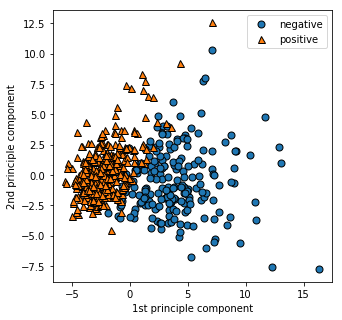

In [19]:
#차원 축소 결과 시각화
plt.figure(figsize=(5, 5))
mglearn.discrete_scatter(data_pca[:, 0], data_pca[:, 1], cancer.target, s=7)

plt.xlabel("1st principle component")
plt.ylabel("2nd principle component")

plt.legend(["negative", "positive"], loc="best") #범례 추가 (loc = 위치 0, 1, 2, 3, best)

principle components는 원본 feature들의 조합으로 표현할 수 있다.  
그럼 어떤 조합으로 이루어져 있을까?

In [39]:
print(pca.components_[0], pca.components_[1], sep='\n\n')

[0.21890244 0.10372458 0.22753729 0.22099499 0.14258969 0.23928535
 0.25840048 0.26085376 0.13816696 0.06436335 0.20597878 0.01742803
 0.21132592 0.20286964 0.01453145 0.17039345 0.15358979 0.1834174
 0.04249842 0.10256832 0.22799663 0.10446933 0.23663968 0.22487053
 0.12795256 0.21009588 0.22876753 0.25088597 0.12290456 0.13178394]

[-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
  0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
 -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
  0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
  0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]


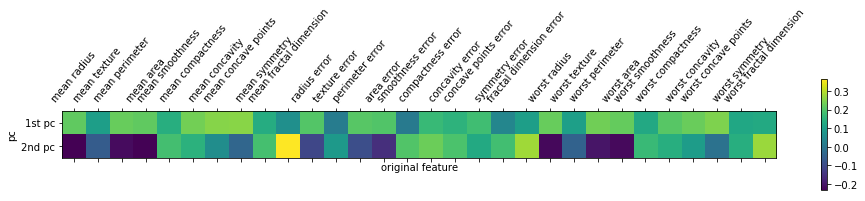

In [21]:
plt.matshow(pca.components_, cmap='viridis') #heatmap

plt.xticks(range(len(cancer.feature_names))
           , cancer.feature_names
           , rotation=50)
plt.yticks([0, 1], ["1st pc", "2nd pc"])

plt.xlabel("original feature")
plt.ylabel("pc")

plt.colorbar()

plt.show()